In [1]:
# Red Lesions Image Labeling from Set 1 -> B (From Masked Image)

import numpy as np
import os 
import cv2

def generate_label(x):
    if(np.sum(x) > 0):
        return 1
    else:
        return 0  

path ="/Users/madhikm1/Desktop/Dataset_En/Set1/B"

files = []
imgData = []
fNames =[]
labels = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

for f in files:
    frame = cv2.imread(f,1)
    imgData.append(cv2.resize(frame,(320,320)))
    parts = f.split("/")
    fName = parts[len(parts)-1]
    label = generate_label(frame)
    fNames.append(fName)
    labels.append(label)


In [2]:
#for part in fNames:
#    print(part)

#for part in labels:
#    print(part)
    
#for part in imgData:
#    print(part.shape)

In [17]:
# Preparing Training Data
training_data = []
for i in range (0 , len(imgData)):
    training_data.append([imgData[i],labels[i]])
    



In [20]:
# suffle Data 
import random
random.shuffle(training_data)

X = []
Y = []
for features_X,label_Y in training_data:
    X.append(features_X)
    Y.append(label_Y)

X = np.array(X)

In [ ]:
X = np.array(X).reshape(-1,320,320,1)
Y = np.array(Y).reshape(-1,320,320,1)



In [6]:
# Serializing output for later

#import pickle
#pickle_out = open("X.pickle","wb")
#pickle.dump(X,pickle_out)
#pickle_out.close()

#pickle_out = open("Y.pickle","wb")
#pickle.dump(Y,pickle_out)
#pickle_out.close()

SyntaxError: invalid syntax (<ipython-input-7-1b5fbfbc0954>, line 1)

0


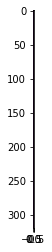

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X[1000][0])
print(training_data[1000][1])

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D






In [10]:
X =X/255.0

In [14]:
len(Y)

3295

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,Y,batch_size=32, epochs=3, validation_split=0.1)

Train on 2965 samples, validate on 330 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
 224/2965 [=>............................] - ETA: 54:26 - loss: 0.8636 - acc: 0.7768